The analysis below showed 3 basic observations:
1.	Capomulin is the only drug that reduces tumor volume in response to treatment.   Tumors still grow under treatment Infubinol, although tumor volume is reduced by 5% after 45 days compared to control.  Ketapril results in a 6% increase in tumor volume after 45 days compared to control.
2.	Capomulin is also the only drug that has a high survival rate compared to placebo at 45 days.   
3.	The analysis of metastatic spread during treatment revealed that Capomulin controlled metastasis by 50% compared to placebo after 45 days of treatment.  Infubinol was also effective at controlling metastasis whereas Ketapril had no effect.          


## Tumor Response to Treatment

In [10]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = os.path.join("data","mouse_drug_data.csv")
clinical_trial = os.path.join("data","clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug)
clinical_trial_df = pd.read_csv(clinical_trial)

# Combine the data into a single dataset
mouse_data = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID", how="left")

# Display the data table for preview
mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_grouped = mouse_data.groupby(["Drug","Timepoint"])
# Convert to DataFrame
TumorVolumeMean = drug_time_grouped["Tumor Volume (mm3)"].mean()
# Preview DataFrame
TumorVolumeMean.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# reset index to make the new df the same level
TV_mean = pd.DataFrame(TumorVolumeMean).reset_index()
TV_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint, then conver to DataFrame
TumorVolumeSE = drug_time_grouped["Tumor Volume (mm3)"].sem()
# reset index to make the new df the same level 
TV_se = pd.DataFrame(TumorVolumeSE).reset_index()
# Preview DataFrame
TV_se.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
TV_mean_refmt = TV_mean.pivot(index = "Timepoint", columns ="Drug", values = "Tumor Volume (mm3)") 
# Preview that Reformatting worked
TV_mean_refmt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [15]:
# collect the time when tumor measured
x = mouse_data["Timepoint"].unique()
x

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

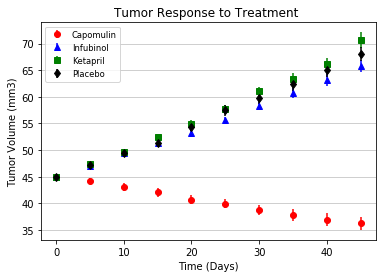

In [19]:
# Generate the Plot (with Error Bars)

# assign error bar variables
Capomulin_ero = TV_se.loc[TV_se["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_ero = TV_se.loc[TV_se["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_ero = TV_se.loc[TV_se["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_ero = TV_se.loc[TV_se["Drug"] == "Placebo", "Tumor Volume (mm3)"]

# plot tumor response to treatment as a scatter chart
plt.errorbar(x, TV_mean_refmt["Capomulin"], yerr = Capomulin_ero, color="red", marker="o", label="Capomulin", linestyle='')
plt.errorbar(x, TV_mean_refmt["Infubinol"], yerr = Infubinol_ero, color="blue", marker="^", label="Infubinol", linestyle='')
plt.errorbar(x, TV_mean_refmt["Ketapril"], yerr = Ketapril_ero, color="green", marker="s", label="Ketapril", linestyle='')
plt.errorbar(x, TV_mean_refmt["Placebo"], yerr = Placebo_ero, color="black", marker="d", label="Placebo", linestyle='')

plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid(axis = 'y', alpha = 0.75)

# Save the Figure
plt.savefig("images/Tumor_Response_To_Treatment.png")

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_grouped = mouse_data.groupby(["Drug","Timepoint"])
# Convert to DataFrame
MS_mean = pd.DataFrame(drug_time_grouped["Metastatic Sites"].mean())
# Preview DataFrame
MS_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [21]:
MS_mean_reset = pd.DataFrame(MS_mean).reset_index()

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_grouped = mouse_data.groupby(["Drug","Timepoint"])
# Convert to DataFrame
MS_se = pd.DataFrame(drug_time_grouped["Metastatic Sites"].sem())
# Preview DataFrame
MS_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [23]:
MS_se_reset = pd.DataFrame(MS_se).reset_index()

In [24]:
# Minor Data Munging to Re-Format the Data Frames
MS_mean_refmt = MS_mean_reset.pivot(index = "Timepoint", columns ="Drug", values = "Metastatic Sites") 
# Preview that Reformatting worked
MS_mean_refmt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


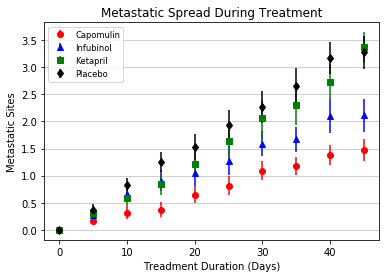

In [25]:
# Generate the Plot (with Error Bars)

# assign error bar variables
Capomulin_ero = MS_se_reset.loc[MS_se_reset["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_ero = MS_se_reset.loc[MS_se_reset["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_ero = MS_se_reset.loc[MS_se_reset["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_ero = MS_se_reset.loc[MS_se_reset["Drug"] == "Placebo", "Metastatic Sites"]

# plot netastatic spread during treatment as a scatter chart
plt.errorbar(x, MS_mean_refmt["Capomulin"], yerr = Capomulin_ero, color="red", marker="o", label="Capomulin", linestyle='')
plt.errorbar(x, MS_mean_refmt["Infubinol"], yerr = Infubinol_ero, color="blue", marker="^", label="Infubinol", linestyle='')
plt.errorbar(x, MS_mean_refmt["Ketapril"], yerr = Ketapril_ero, color="green", marker="s", label="Ketapril", linestyle='')
plt.errorbar(x, MS_mean_refmt["Placebo"], yerr = Placebo_ero, color="black", marker="d", label="Placebo", linestyle='')

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treadment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid(axis = 'y', alpha = 0.75)

# Save the Figure
plt.savefig("images/Metastatic_Spread_During_Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_time_grouped = mouse_data.groupby(["Drug","Timepoint"])
# Convert to DataFrame
mice_count = drug_time_grouped["Mouse ID"].count().reset_index()
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# rename column label "Mouse ID" to meaningful column label 
renamed_mice_count = mice_count.rename(columns={"Mouse ID":"Mouse Count"})
renamed_mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_refmt = renamed_mice_count.pivot(index = "Timepoint", columns ="Drug", values = "Mouse Count") 
# Preview that Reformatting worked
mice_count_refmt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


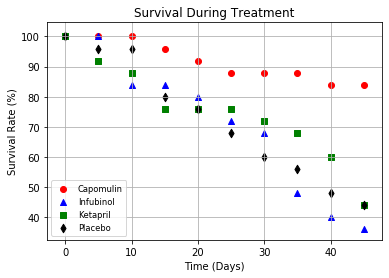

In [29]:
# Generate the Plot (Accounting for percentages)
plt.scatter(x, mice_count_refmt["Capomulin"]/max(mice_count_refmt["Capomulin"])*100, color="red", marker="o", label="Capomulin")
plt.scatter(x, mice_count_refmt["Infubinol"]/max(mice_count_refmt["Infubinol"])*100, color="blue", marker="^", label="Infubinol")
plt.scatter(x, mice_count_refmt["Ketapril"]/max(mice_count_refmt["Ketapril"])*100, color="green", marker="s", label="Ketapril")
plt.scatter(x, mice_count_refmt["Placebo"]/max(mice_count_refmt["Placebo"])*100, color="black", marker="d", label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.legend(loc="lower left", fontsize="small", fancybox=True)

plt.grid()

# Save the Figure
plt.savefig("images/Survival_During_Treatment.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [30]:
# Assign the first and the last time point mean tumor volume (TV)
first_TV = TV_mean_refmt.loc[0, :]
last_TV = TV_mean_refmt.loc[45, :]

# Calculate the percent changes for each drug
TV_percent_change = ((last_TV - first_TV)/first_TV)*100

# Display the data to confirm
TV_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [31]:
# Store all Relevant Percent Changes into a Tuple
TV_percent_tuple = (TV_percent_change["Capomulin"],TV_percent_change["Infubinol"],TV_percent_change["Ketapril"],TV_percent_change["Placebo"])
TV_percent_tuple
# Splice the data between passing and failing drugs
passing_drug_list = []
failing_drug_list = []

for percent in TV_percent_tuple:
    if percent <= 0:
        passing_drug_list.append(percent)
    else:
        failing_drug_list.append(percent)

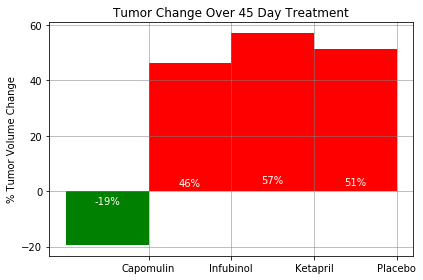

In [32]:
# Orient widths. Add labels, tick marks, etc. 
percent_a = passing_drug_list 
percent_b = failing_drug_list
x_axis1 = [0]
x_axis2 = [1, 2, 3]

plot_a = plt.bar(x_axis1, percent_a, color = "green", width = -1, align = "edge")
plot_b = plt.bar(x_axis2, percent_b, color = "red", width = -1, align = "edge")
tick=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.xticks(x_axis1 + x_axis2, tick)
plt.yticks([-20, 0, 20, 40, 60])

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')

# Use functions to label the percentages of changes 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")

# Call functions to implement the function calls
autolabel(plot_a)
autolabel(plot_b)
plt.tight_layout()

# Save the Figure
plt.savefig("images/Tumor_Change_Over_45_Day_Treatment.png")

# Show the Figure
plt.show()